In [1]:
%cd /content
!pip install nose
!pip install tensorflow-addons
!rm -rf boltzmann-machines
!git clone --single-branch --depth=1 --branch experimental-tf2 https://github.com/hannesdm/boltzmann-machines.git
%cd /content/boltzmann-machines
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['axes.grid'] = False
import logging, os
logging.disable(logging.WARNING)
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

from examples import callable_dbm_mnist
from keras.datasets import mnist
from sklearn.neural_network import BernoulliRBM
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from boltzmann_machines import DBM
from boltzmann_machines.rbm import BernoulliRBM
from boltzmann_machines.utils import im_plot

/content
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 1.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 8.1 MB/s eta 0:00:00
Cloning into 'boltzmann-machines'...
remote: Enumerating objects: 274, done.
remote: Counting objects: 100% (274/274), done.
remote: Compressing objects: 100% (262/262), done.
remote: Total 274 (delta 7), reused 224 (delta 3), pack-reused 0
Receiving objects: 100% (274/274), 210.63 MiB | 13.61 MiB/s, done.
Resolving deltas: 100% (7/7), done.
Updating files: 100% (266/266), done.
/content/boltzmann-machines


/usr/local/lib/python3.9/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


Mount drive


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
plot_dir = "/content/drive/MyDrive/Colab Notebooks/Assignment 4/Plots"

## Load the mnist data

In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0],-1))
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

11490434/11490434 [==============================] - 2s 0us/step


## Load a pretrained model and visualise the components
To prevent losing too much time on training a deep model, a working pretrained RBM will be used. <br/>
**Exercise** Observe the components (weights of each neuron) of the DBM and compare with the components of the previously trained RBM in exercise 1. What is the difference?<br/>
Can you explain the difference between the components of the first and second layer of the DBM?


In [3]:
rbm1 = BernoulliRBM.load_model('/content/boltzmann-machines/models/dbm_mnist_rbm1/')
rbm2 = BernoulliRBM.load_model('/content/boltzmann-machines/models/dbm_mnist_rbm2/')
dbm = DBM.load_model('/content/boltzmann-machines/models/dbm_mnist/')
dbm.load_rbms([rbm1, rbm2])

/usr/local/lib/python3.9/dist-packages/tensorflow/python/summary/summary.py:832: UserWarning: Cannot activate TF2 compatibility support for TF1 summary ops: default summary writer not found.
  warnings.warn(


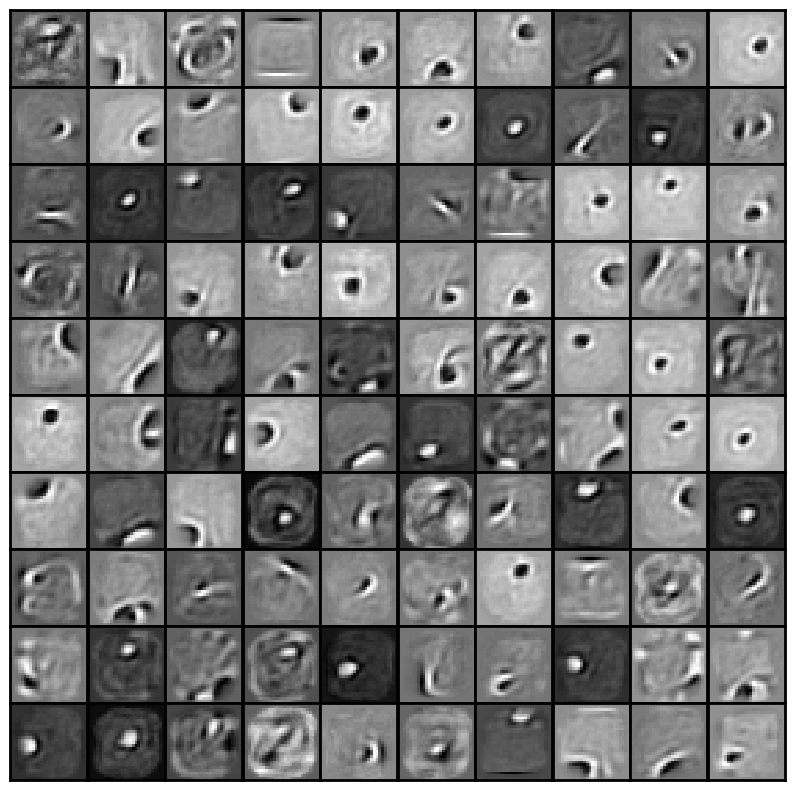

In [8]:
import tensorflow as tf 
W1_joint = dbm._W[0].value().numpy()

fig = plt.figure(figsize=(10, 10))
im_plot(W1_joint.T, shape=(28, 28), title='',
        title_params={'fontsize': 20}, imshow_params={'cmap': plt.cm.gray})

plt.savefig(plot_dir + "DBM_first_layer.pdf", bbox_inches="tight")

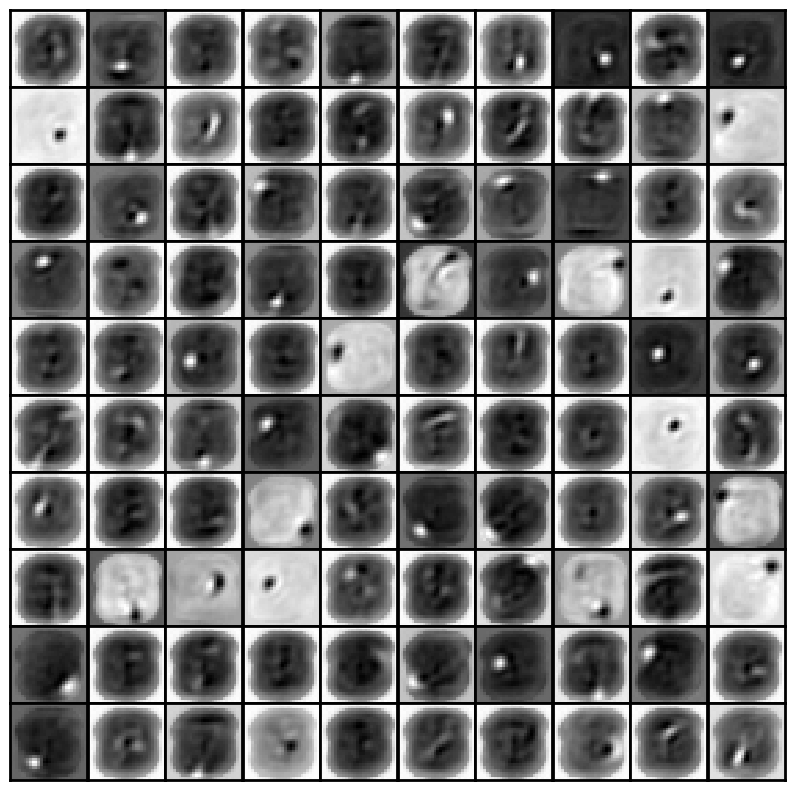

In [9]:
W2_joint = dbm._W[1].value().numpy()
U_joint = W1_joint.dot(W2_joint)

fig = plt.figure(figsize=(10, 10))
im_plot(U_joint.T, shape=(28, 28), title='',
        title_params={'fontsize': 20})
plt.savefig(plot_dir + "DBM_second_layer.pdf", bbox_inches="tight")

In [17]:
# W3_joint = dbm._W[2].value().numpy()
# U_joint = W2_joint.dot(W3_joint)

# fig = plt.figure(figsize=(10, 10))
# im_plot(U_joint.T, shape=(28, 28), title='',
#         title_params={'fontsize': 20})
# plt.savefig(plot_dir + "DBM_third_layer.pdf", bbox_inches="tight")

## Sample the DBM
**Exercise** Comment on the quality of the samples and compare them with the samples from the RBM.<br/>
Do you see a difference in quality? Explain why.

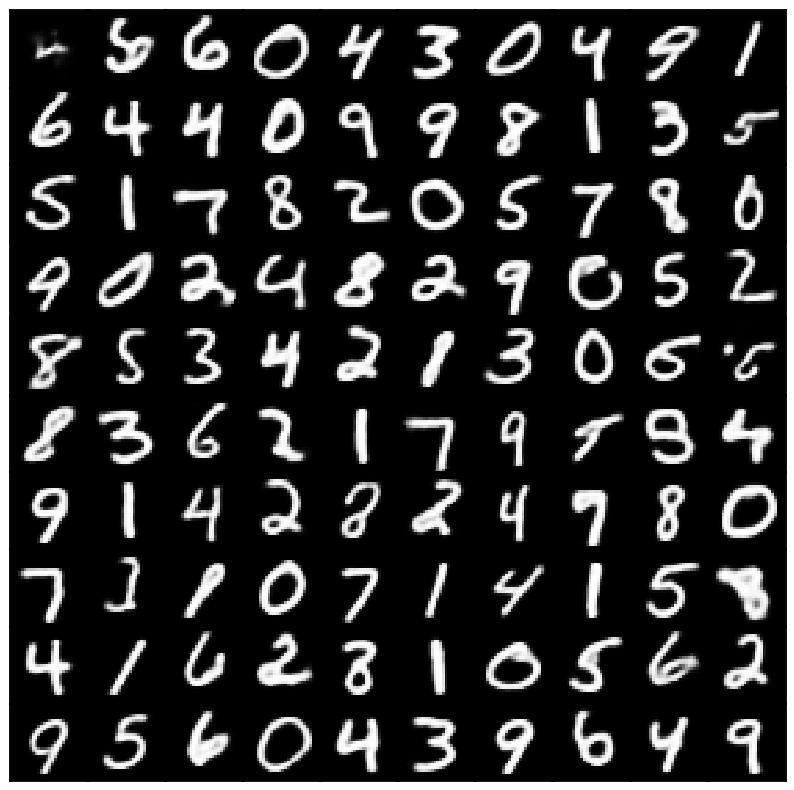

In [18]:
gibbs_steps = 1000

V = dbm.sample_v(n_gibbs_steps=gibbs_steps)

fig = plt.figure(figsize=(10, 10))
im_plot(V, shape=(28, 28), title='',
        imshow_params={'cmap': plt.cm.gray})
plt.savefig(plot_dir + "DBM_sample.pdf", bbox_inches="tight")